# Debugging the Training Set

In [8]:
%matplotlib notebook

In [25]:
# import
import pdb
import os
from linetools.spectra import io as lsio
from linetools import utils as ltu

from pyigm.surveys.dlasurvey import DLASurvey

## index 196 in file [training_20456_5000.hdf5]

### Load

In [31]:
spec_20456 = lsio.readspec(os.getenv('DROPBOX_DIR')+'/MachineLearning/DLAs/training_20456_5000.hdf5')

In [5]:
spec_20456.select = 196

<IPython.core.display.Javascript object>


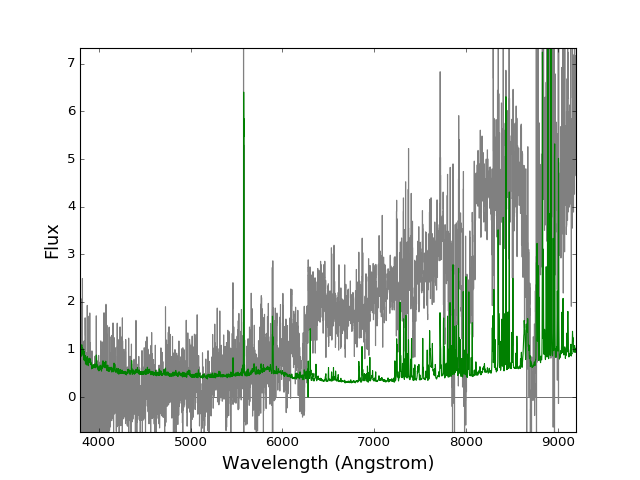

In [9]:
# Strange qso..  Probably BAL nonsense
#  And probably should not have inlucded it in the training set..
spec_20456.plot()

In [12]:
spec_20456.header['PLATE'], spec_20456.header['FIBER']

(538, 168)

In [13]:
spec_20456.header['zem']

2.36299991607666

## Check zabs vs. zem

In [32]:
dlas = ltu.loadjson(os.getenv('DROPBOX_DIR')+'/MachineLearning/DLAs/training_20456_5000.json')

In [33]:
for ispec in range(spec_20456.nspec):
    spec_20456.select = ispec
    zem = spec_20456.header['zem']
    for ii in range(dlas[str(ispec)]['nDLA']):
        if dlas[str(ispec)][str(ii)]['zabs'] > zem:
            pdb.set_trace()

In [23]:
spec_20456.select = 228

<IPython.core.display.Javascript object>


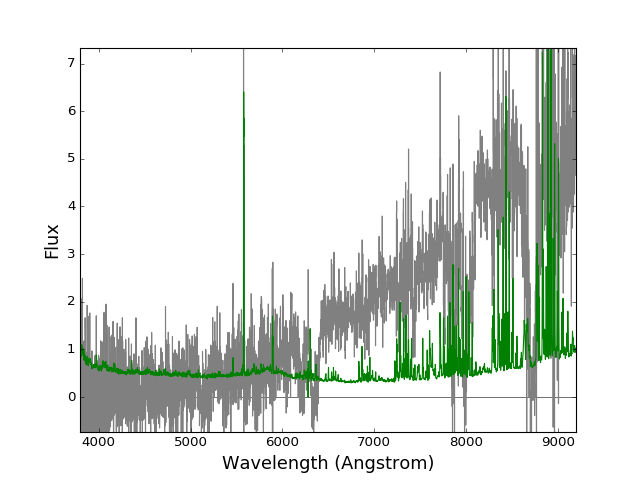

In [24]:
spec_20456.plot()

## Bad zem??

In [26]:
sdss = DLASurvey.load_SDSS_DR5(sample='all')

SDSS-DR5: Loading DLA file /Users/xavier/local/Python/pyigm/pyigm/data/DLA/SDSS_DR5/dr5_alldla.fits.gz
SDSS-DR5: Loading QSOs file /Users/xavier/local/Python/pyigm/pyigm/data/DLA/SDSS_DR5/dr5_dlagz_s2n4.fits


In [28]:
badsl = (sdss.sightlines['PLATE'] == 538) & (sdss.sightlines['FIB'] == 168)

In [29]:
sdss.sightlines[badsl]

PLATE,FIB,RA,DEC,FLG_BAL,IQSO,MAG,S2N,Z_START,Z_END,ZEM,DX
,,deg,deg,,,,,,,,
int32,int32,float64,float64,int16,int32,float64,float64,float64,float64,float64,float64
538,168,224.01283,1.2459806,0,5289,20.545999527,5.6049041748,4.19218720285,4.22876405716,4.28157997131,0.15294242902
